In [19]:
import pandas as pd
import numpy as np
import cv2

import os
import matplotlib.pyplot as plt
%matplotlib inline

input_shape = (101, 101)

In [33]:
def rle_decode(mask_rle, shape=input_shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    if type(mask_rle) == float:
        return img.reshape(shape).T
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

def masks_as_image(in_mask_list):
    # Take the individual ship masks and create a single mask array for all ships
    all_masks = np.zeros(input_shape, dtype = np.uint8)
    for mask in in_mask_list:
        if isinstance(mask, str):
            all_masks |= rle_decode(mask)
    return all_masks

def masks_as_color(in_mask_list):
    # Take the individual ship masks and create a color mask array for each ships
    all_masks = np.zeros(input_shape, dtype = np.float)
    scale = lambda x: (len(in_mask_list)+x+1) / (len(in_mask_list)*2) ## scale the heatmap image to shift 
    for i,mask in enumerate(in_mask_list):
        if isinstance(mask, str):
            all_masks[:,:] += scale(i) * rle_decode(mask)
    return all_masks

In [43]:
train = pd.read_csv('../input/train.csv')
depth = pd.read_csv('../input/depths.csv')

../input/train/masks/575d24d81d.png
../input/train/masks/a266a2a9df.png
../input/train/masks/75efad62c1.png
../input/train/masks/34e51dba6a.png
../input/train/masks/4875705fb0.png
../input/train/masks/782ae9b7e7.png
../input/train/masks/9842f69f8d.png
../input/train/masks/aa94cfb806.png
../input/train/masks/50d3073821.png
../input/train/masks/28f865caaa.png
../input/train/masks/b5e1371b3b.png
../input/train/masks/57e394bc67.png


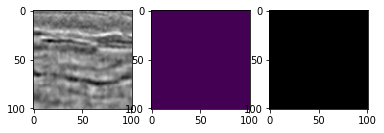

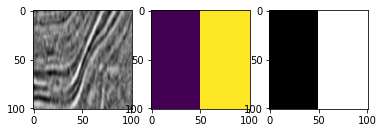

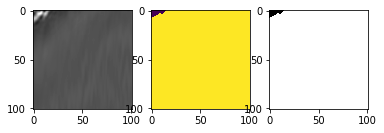

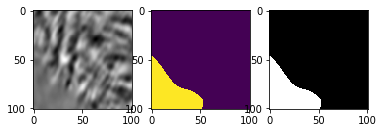

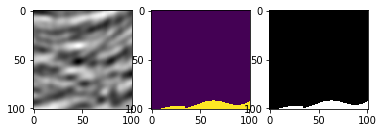

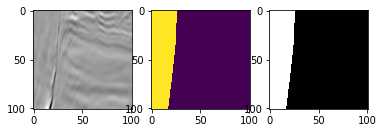

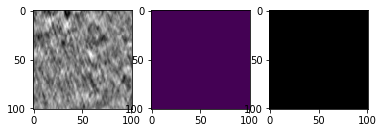

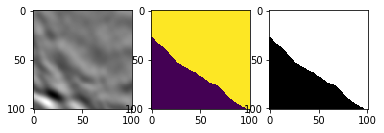

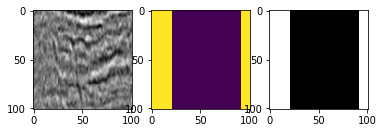

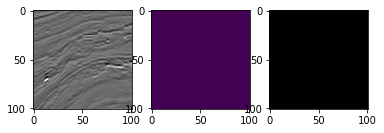

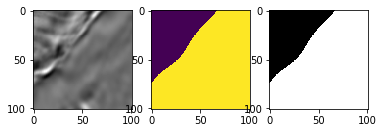

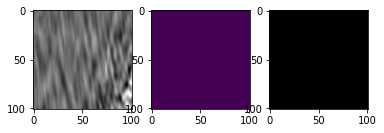

In [42]:
for idx, row in train.iterrows():
    path = os.path.join('../input/train/images/','{}.png'.format(row.id))
    img = cv2.imread(path)
    mask = rle_decode(row.rle_mask)
    
    pre_mask_path = os.path.join('../input/train/masks/', '{}.png'.format(row.id))
    pre_mask = cv2.imread(pre_mask_path)
    
    
    fig, (ax1, ax2, ax3) =  plt.subplots(1, 3)
    ax1.imshow(img)
    ax2.imshow(mask)
    ax3.imshow(pre_mask)
    if idx > 10:
        break

In [21]:
mask = masks_as_image(row.rle_mask)

In [29]:
type(row.rle_mask) == float

True

In [37]:
pre_mask.shape

(101, 101, 3)

In [41]:
pre_mask[...,2].max()

255

In [46]:
(256,256)+(1,)

(256, 256, 1)